# Suicides by month of death

https://www.destatis.de/EN/Themes/Society-Environment/Health/Causes-Death/Tables/deaths-suicide-months.html

# Import Modules

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                                      # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Health/Causes-Death/Tables/deaths-suicide-months.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
tbody = soup.find_all('tbody')
trs = tbody[0].find_all('tr')


months = []
yr_2010 = []
yr_2011 = []
yr_2012 = []
yr_2013 = []
yr_2014 = []
yr_2015 = []
yr_2016 = []
yr_2017 = []
yr_2018 = []
yr_2019 = []
yr_2020 = []


for tr in trs:
  months.append(tr.find_all('td')[0].string)
  yr_2010.append(tr.find_all('td')[1].string)
  yr_2011.append(tr.find_all('td')[2].string)
  yr_2012.append(tr.find_all('td')[3].string)
  yr_2013.append(tr.find_all('td')[4].string)
  yr_2014.append(tr.find_all('td')[5].string)
  yr_2015.append(tr.find_all('td')[6].string)
  yr_2016.append(tr.find_all('td')[7].string)
  yr_2017.append(tr.find_all('td')[8].string)
  yr_2018.append(tr.find_all('td')[9].string)
  yr_2019.append(tr.find_all('td')[10].string)
  yr_2020.append(tr.find_all('td')[11].string)

# Create Dataframe

In [6]:
data = {
    'Months': months,
    '2010': yr_2010,
    '2011': yr_2011,
    '2012': yr_2012,
    '2013': yr_2013,
    '2014': yr_2014,
    '2015': yr_2015,
    '2016': yr_2016,
    '2017': yr_2017,
    '2018': yr_2018,
    '2019': yr_2019,
    '2020': yr_2020,
}

df = pd.DataFrame(data=data)

# Head and Tail

In [7]:
df

,Months,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,January,794,814,887,822,842,824,872,793,858,776,780
1,February,773,719,747,748,762,785,747,752,633,704,771
2,March,957,855,910,830,884,933,877,850,832,765,776
3,April,928,903,769,969,876,880,867,758,852,786,721
4,May,812,914,885,891,927,870,861,860,867,767,842
5,June,849,838,770,899,807,862,852,812,782,768,840
6,July,909,884,863,896,931,905,864,775,824,808,805
7,August,808,941,932,843,803,854,803,789,757,778,796
8,September,824,846,769,842,873,816,802,685,760,660,750
9,October,801,858,804,848,840,811,824,740,786,760,747


In [8]:
df.shape

(12, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Months  12 non-null     object
 1   2010    12 non-null     object
 2   2011    12 non-null     object
 3   2012    12 non-null     object
 4   2013    12 non-null     object
 5   2014    12 non-null     object
 6   2015    12 non-null     object
 7   2016    12 non-null     object
 8   2017    12 non-null     object
 9   2018    12 non-null     object
 10  2019    12 non-null     object
 11  2020    12 non-null     object
dtypes: object(12)
memory usage: 1.2+ KB


In [10]:
cols = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

df[cols] = df.drop(columns='Months').applymap(lambda x: pd.to_numeric(x))
df.dtypes.value_counts()

int64     11
object     1
dtype: int64

In [11]:
df.describe(include='object')

,Months
count,12
unique,12
top,January
freq,1


In [12]:
df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,835.083333,845.333333,824.166667,839.666667,850.750000,839.833333,819.833333,769.583333,783.000000,753.416667,767.166667
std,69.252448,62.578436,67.528894,70.328235,51.271337,57.075442,55.344924,55.982884,69.729347,41.053088,51.985721
min,712.000000,719.000000,744.000000,720.000000,762.000000,719.000000,722.000000,682.000000,633.000000,660.000000,664.000000
25%,799.250000,808.750000,769.000000,808.500000,806.500000,814.750000,788.250000,739.750000,753.750000,745.250000,740.500000
50%,818.000000,850.500000,807.000000,842.500000,850.500000,839.000000,838.000000,766.500000,784.000000,766.000000,773.500000
75%,867.750000,888.750000,885.500000,892.250000,878.000000,872.500000,864.750000,797.750000,837.000000,776.500000,798.250000
max,957.000000,941.000000,932.000000,969.000000,931.000000,933.000000,877.000000,860.000000,867.000000,808.000000,842.000000


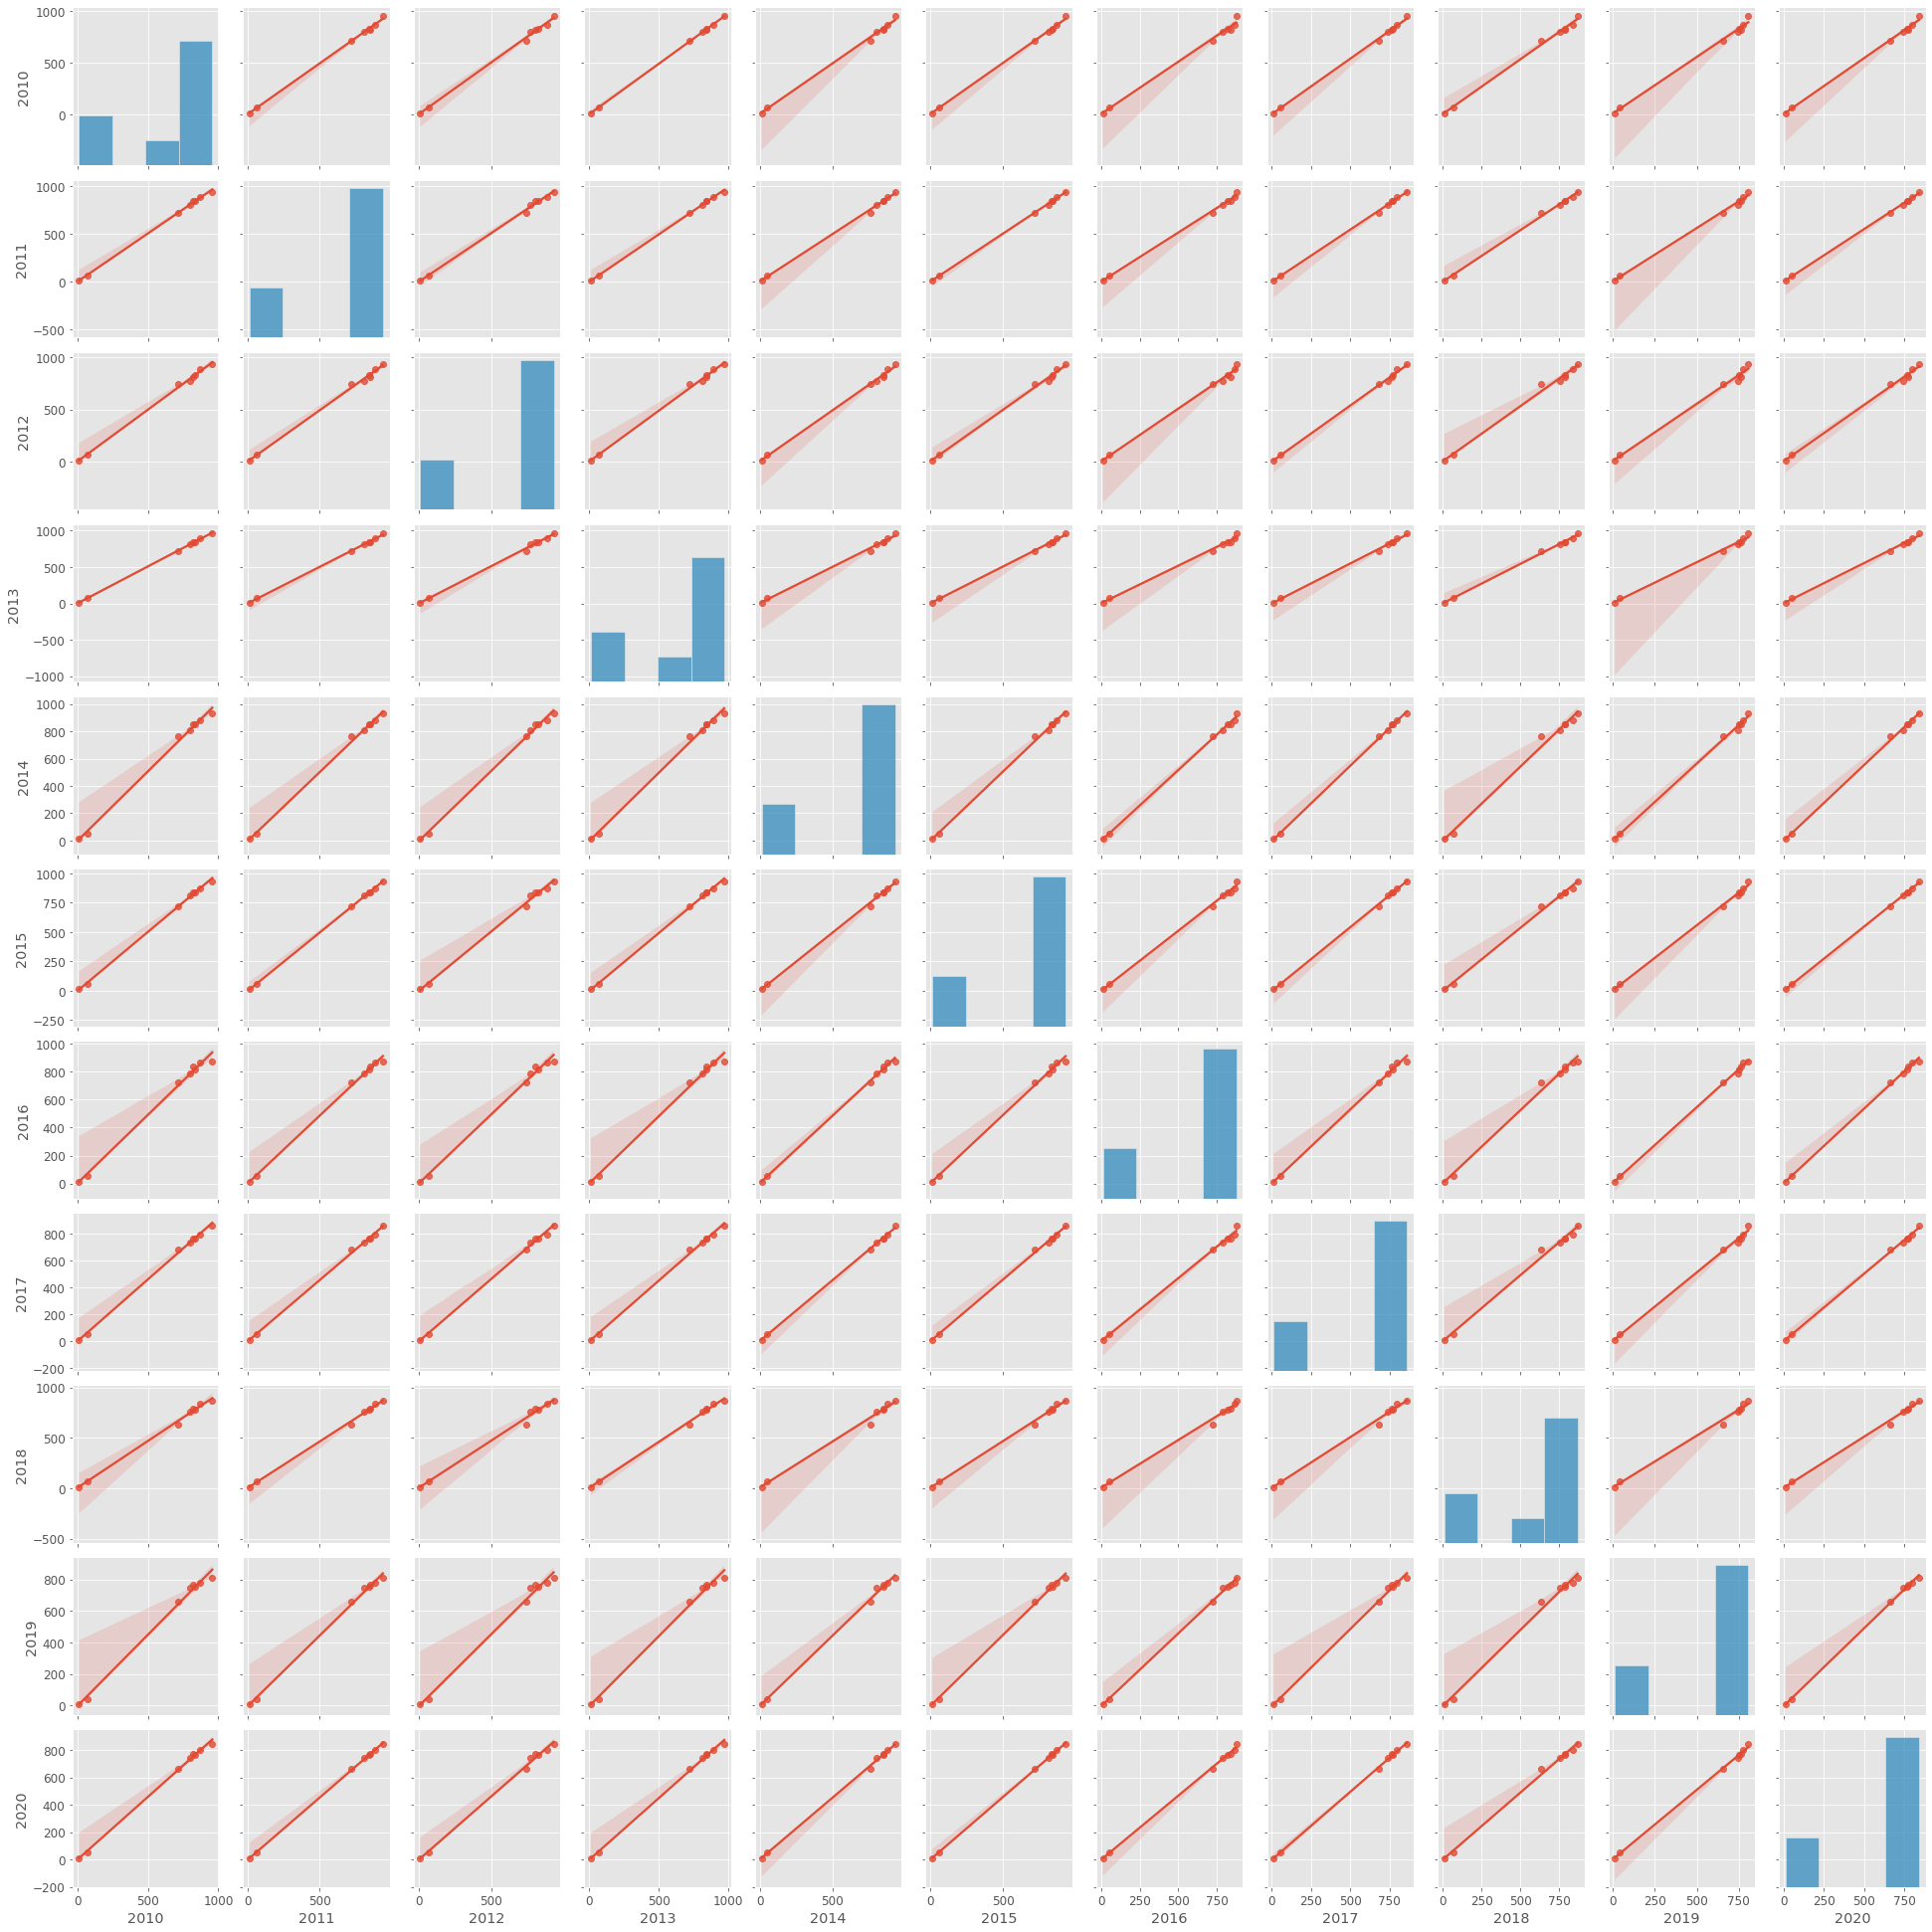

In [13]:
sns.pairplot(df.describe(), kind='reg')

# Data Visualization

[Text(0.5, 1.0, 'Number of suicides by month in Germany'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Suicides')]

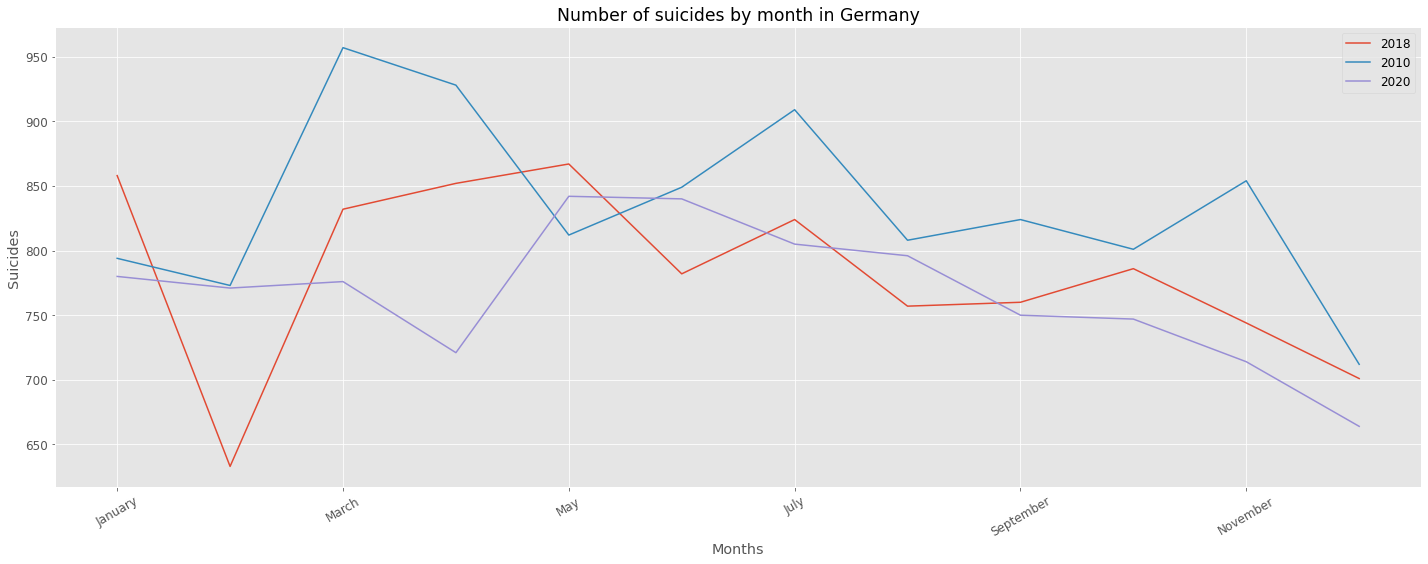

In [14]:
ax1 = df.set_index('Months')[['2018', '2010', '2020']].plot(kind='line', figsize=(20, 8), rot=30)
ax1.set(title='Number of suicides by month in Germany', xlabel='Months', ylabel='Suicides')